In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2000-01-01'
end = '2023-12-31'

df = yf.download("AAPL", start, end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.846127,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.774790,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.786128,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.718097,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.752113,460734400


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.333298,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.284637,42628800


In [4]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.846127,535796800
1,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.774790,512377600
2,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.786128,778321600
3,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.718097,767972800
4,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.752113,460734400


In [5]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,0.936384,1.004464,0.907924,0.999442,535796800
1,0.966518,0.987723,0.903460,0.915179,512377600
2,0.926339,0.987165,0.919643,0.928571,778321600
3,0.947545,0.955357,0.848214,0.848214,767972800
4,0.861607,0.901786,0.852679,0.888393,460734400


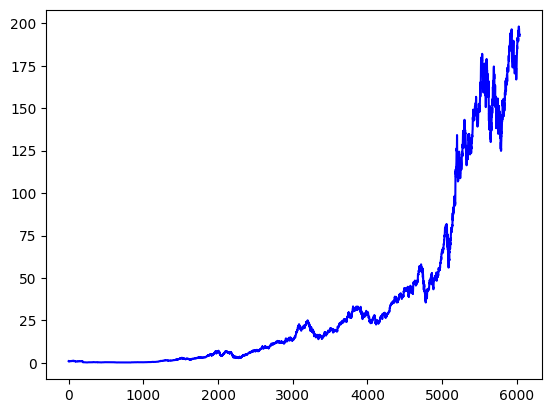

In [6]:
plt.plot(df.Close, 'b')

In [7]:
df

,Open,High,Low,Close,Volume
0,0.936384,1.004464,0.907924,0.999442,535796800
1,0.966518,0.987723,0.903460,0.915179,512377600
2,0.926339,0.987165,0.919643,0.928571,778321600
3,0.947545,0.955357,0.848214,0.848214,767972800
4,0.861607,0.901786,0.852679,0.888393,460734400
...,...,...,...,...,...
6032,195.179993,195.410004,192.970001,193.600006,37122800
6033,193.610001,193.889999,192.830002,193.050003,28919300
6034,192.490005,193.500000,191.089996,193.149994,48087700
6035,194.139999,194.660004,193.169998,193.580002,34049900


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
6032    181.768301
6033    181.787101
6034    181.898701
6035    182.046001
6036    182.173301
Name: Close, Length: 6037, dtype: float64

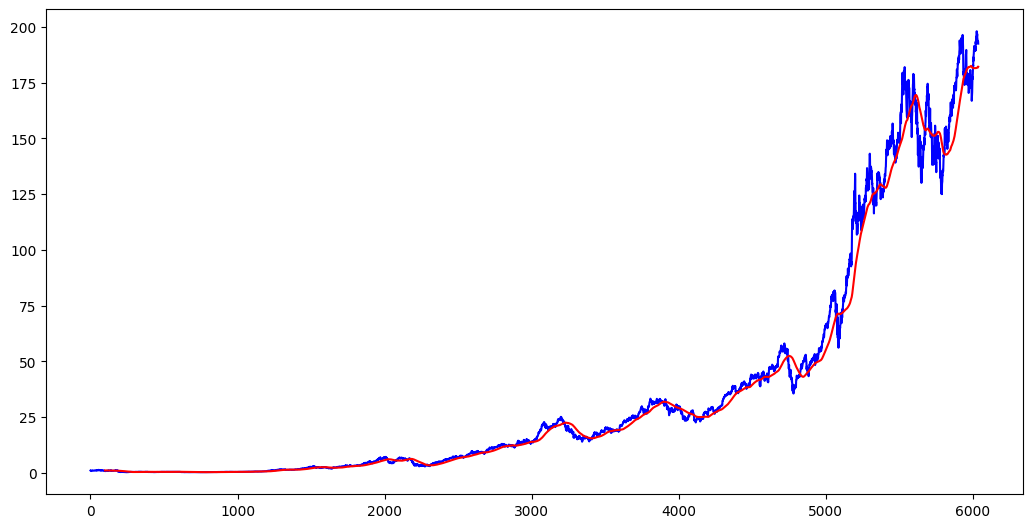

In [9]:
plt.figure(figsize=(12.6, 6.3))  

plt.plot(df.Close, 'b')
plt.plot(ma100, 'r')

plt.show()

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
6032    178.649100
6033    178.871851
6034    179.085250
6035    179.290201
6036    179.487900
Name: Close, Length: 6037, dtype: float64

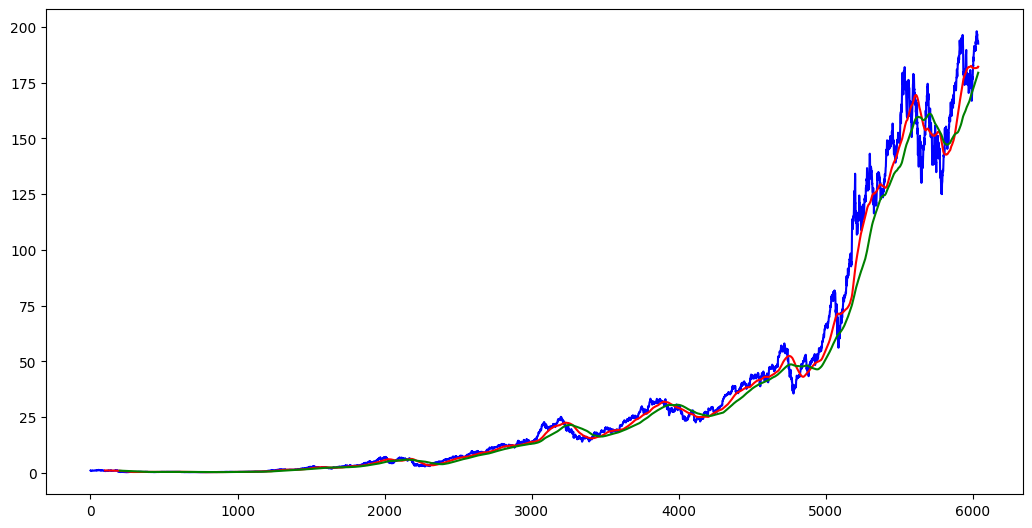

In [11]:
plt.figure(figsize=(12.6, 6.3))  

plt.plot(df.Close, 'b')
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

plt.show()

In [12]:
df.shape

(6037, 5)

# Splitting Data into Training and Testing

In [13]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])

print(data_training.shape)
print(data_testing.shape)                             

(4225, 1)
(1812, 1)


In [14]:
data_training.head()

,Close
0,0.999442
1,0.915179
2,0.928571
3,0.848214
4,0.888393


In [15]:
data_testing.head()

,Close
4225,29.367500
4226,29.280001
4227,29.264999
4228,29.150000
4229,29.412500


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02317551],
       [0.0206233 ],
       [0.02102893],
       ...,
       [0.87869415],
       [0.88361601],
       [0.88301028]])

In [18]:
data_training_array.shape

(4225, 1)

In [19]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train.shape

(4125, 100, 1)

# ML Model

In [21]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 37s 207ms/step - loss: 0.0430
Epoch 2/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 27s 205ms/step - loss: 0.0064
Epoch 3/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 26s 202ms/step - loss: 0.0048
Epoch 4/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 29s 224ms/step - loss: 0.0050
Epoch 5/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 28s 218ms/step - loss: 0.0041
Epoch 6/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 26s 203ms/step - loss: 0.0039
Epoch 7/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 26s 202ms/step - loss: 0.0037
Epoch 8/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 26s 205ms/step - loss: 0.0033
Epoch 9/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 26s 205ms/step - loss: 0.0035
Epoch 10/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 26s 202ms/step - loss: 0.0033
Epoch 11/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 26s 203ms/step - loss: 0.0029
Epoch 12/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 26s 201ms/step - loss: 0.0028
Epoch 13/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 26s 202ms/step - loss: 0.0026
Epoch 14/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 26s 204ms/step - loss: 0.0027
Epoch 15/50
129

In [27]:
model.save('Keras_model.h5')

In [28]:
data_testing.head()

,Close
4225,29.367500
4226,29.280001
4227,29.264999
4228,29.150000
4229,29.412500


In [29]:
data_testing.tail(100)

,Close
5937,178.190002
5938,177.970001
5939,177.789993
5940,179.460007
5941,177.449997
...,...
6032,193.600006
6033,193.050003
6034,193.149994
6035,193.580002


In [30]:
past_100_days = data_training.tail(100)

In [31]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [32]:
final_df.head()

,Close
0,25.102501
1,25.087500
2,24.965000
3,24.615000
4,24.430000


In [33]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.01195032],
       [0.01186465],
       [0.01116505],
       ...,
       [0.97167329],
       [0.97412908],
       [0.96813249]])

In [34]:
input_data.shape

(1912, 1)

In [35]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [36]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1812, 100, 1)
(1812,)


# Making Predictions

In [37]:
y_predicted = model.predict(x_test)

57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step


In [38]:
y_predicted.shape

(1812, 1)

In [39]:
y_test

array([0.03630782, 0.03580811, 0.03572244, ..., 0.97167329, 0.97412908,
       0.96813249])

In [40]:
y_predicted

array([[0.07127014],
       [0.07196814],
       [0.07268988],
       ...,
       [0.91346097],
       [0.910061  ],
       [0.9067377 ]], dtype=float32)

In [41]:
scaler.scale_

array([0.00571102])

In [42]:
scale_factor = 1/0.00571102
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

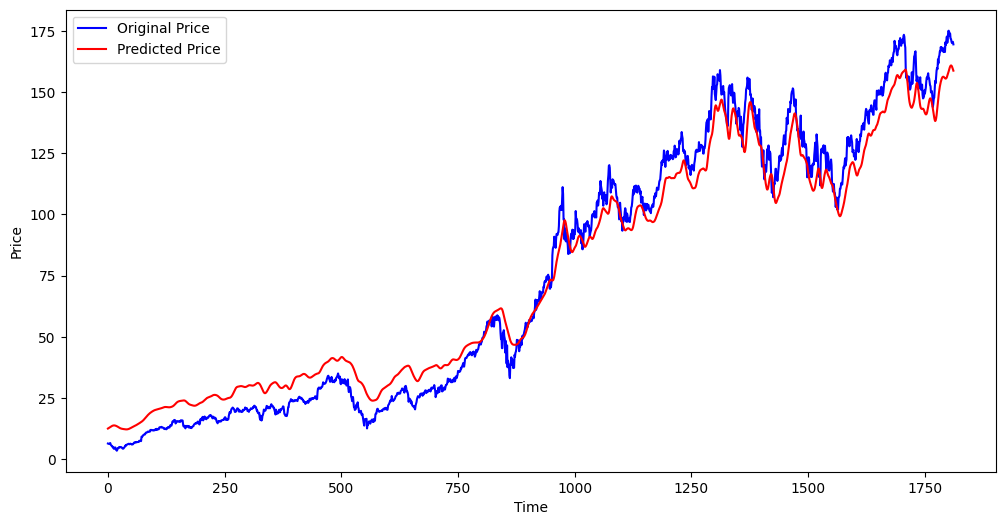

In [43]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()